# Compare Germany data sources: JHU and RKI

See [this earlier post](compare-rki-and-jhu-data.html) for an introduction. Here we continue the comparison of RKI and JHU with some additional plots. In particular, we note a significant delay in the provision of numbers of deaths in the RKI data.

In [1]:
%config InlineBackend.figure_formats = ['svg']
import datetime
import numpy as np
import pandas as pd
import oscovida as ov

ov.display_binder_link("2020-compare-germany-data-sources.ipynb")

[Execute this notebook with Binder](https://mybinder.org/v2/gh/oscovida/binder/master?filepath=ipynb/2020-compare-germany-data-sources.ipynb)

In [2]:
# clear the local cache, i.e. force re-download of data sets
# ov.clear_cache()

## Get data from Johns Hopkins University (JHU)

In [3]:
cases_jhu, deaths_jhu = ov.get_country_data("Germany")

## Get data from Robert-Koch Institute (RKI)


In [4]:
germany = ov.fetch_data_germany()

In [5]:
# We use 'Meldedatum' as this is expected to be closest to the JHU data
g2 = germany.set_index(pd.to_datetime(germany['Meldedatum']))
g2.index.name = 'date'
g3 = g2.groupby('date').agg('sum')
cases_rki = g3["AnzahlFall"].groupby('date').agg('sum').cumsum()
deaths_rki = g3["AnzahlTodesfall"].groupby('date').agg('sum').cumsum()


# Overview plot Germany with RKI data

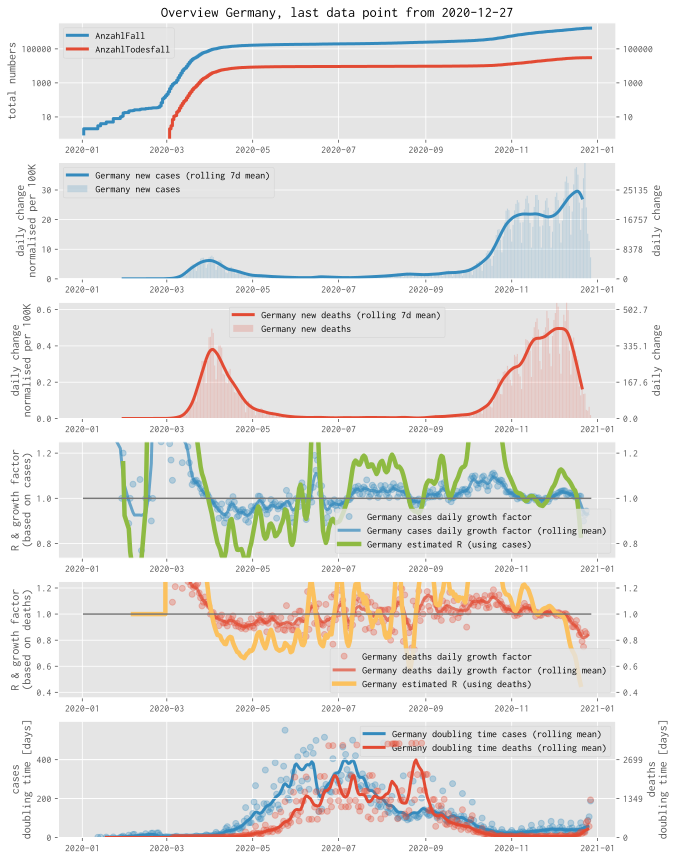

In [6]:
ov.overview(country="Germany", data=(cases_rki, deaths_rki));

## Overview plot Germany with JHU data

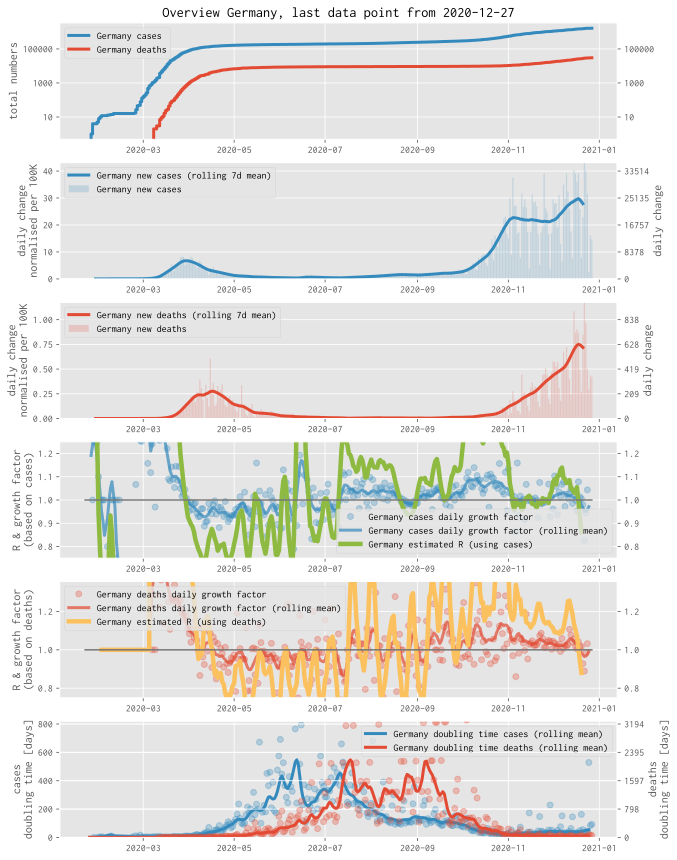

In [7]:
ov.overview(country="Germany");

## More detailed comparison of cases and deaths

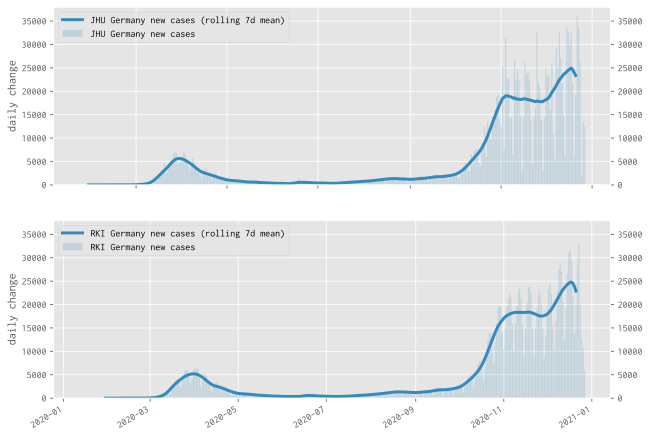

In [8]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
ax = axes[0]
ov.plot_daily_change(ax, cases_jhu, color="C1", labels=["JHU Germany", "cases"])
ax = axes[1]
ov.plot_daily_change(ax, cases_rki, color="C1", labels=["RKI Germany", "cases"])
fig.autofmt_xdate()
axes[1].set_ylim(axes[0].get_ylim());

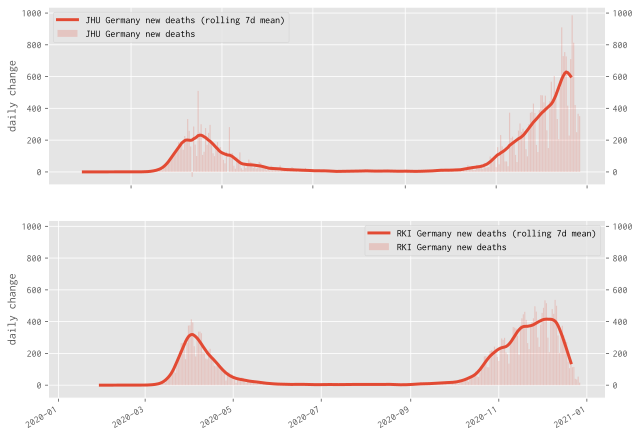

In [9]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
ax = axes[0]
ov.plot_daily_change(ax, deaths_jhu, color="C0", labels=["JHU Germany", "deaths"])
ax = axes[1]
ov.plot_daily_change(ax, deaths_rki, color="C0", labels=["RKI Germany", "deaths"])
fig.autofmt_xdate()
axes[1].set_ylim(axes[0].get_ylim());

## Discussion

The JHU and RKI data provided for Germany show some differences, including:

- the JHU data is noisier in comparison to the smoother RKI data
- the amount of deaths in the last week is overestimated in the JHU data or underestimated in the RKI

Both phenomena can be explained with the hypothesis that the RKI data is updated retrospectively to introduce corrections: if a death that has been occured 3 days ago is registered with the RKI, it will update the data set and add that death to the date 3 days ago. In contrast, we hypothesize that the JHU data appears to try to be as accurate as possible, but not retrospectively change dates in the past but rather add corrective numbers to the last data point (sometimes even negative deaths if required to compensate for inaccurate data). 

The more regular data from the RKI is thus explainable by the retrospective improvement of the data: as more and more numbers appear at the RKI (even from weeks in the past), the data set becomes increasingly more accurate. 

The underestimation of deaths and cases from RKI could also be explained: as reported cases and deaths may only arrive at the RKI days after their occurance, the numbers that are reported today for yesterday are likely to be too small. There is a danger that this is misleading. We investigate this aspect further now.



### Example: deaths up to 13 November 2020

To emphasive the delay in the numbers being reported, we look at a particular data set up to 13 November 2020 as an example:

On 14 November, we saved the dataset *as it was available then* from the RKI and the JHU university to local files. We now load the data as it was downloded on 14 November 2020, i.e. with last data point from 13 Nov:


In [10]:
# 
# The code used to create the RKI data set is 
# # We use 'Meldedatum' as this is expected to be closest to the JHU data
# germany = ov.fetch_data_germany()
# g2 = germany.set_index(pd.to_datetime(germany['Meldedatum']))
# g2.index.name = 'date'
# g3 = g2.groupby('date').agg('sum')
# cases_rki = g3["AnzahlFall"].groupby('date').agg('sum').cumsum()
# deaths_rki = g3["AnzahlTodesfall"].groupby('date').agg('sum').cumsum()
# (then save to csv file)

In [11]:
cases_rki_old = pd.read_csv("cases-rki-germany-meldedatum-2020-11-13.csv", parse_dates=['date'], 
                            index_col=0, squeeze=True)
deaths_rki_old = pd.read_csv("deaths-rki-germany-meldedatum-2020-11-13.csv", parse_dates=['date'], 
                             index_col=0, squeeze=True)
cases_jhu_old = pd.read_csv("cases-jhu-germany-2020-11-13.csv", parse_dates=[0], 
                            index_col=0, squeeze=True)
deaths_jhu_old = pd.read_csv("deaths-jhu-germany-2020-11-13.csv", parse_dates=[0], 
                             index_col=0, squeeze=True)

In [12]:
todaystring = deaths_jhu.index[-1].strftime("%Y-%m-%d")

In [13]:
todaystring

'2020-12-27'

In [24]:
max(deaths_jhu_old[startdate:enddate] - deaths_jhu[startdate:enddate])

0

In [25]:
max(cases_jhu_old[startdate:enddate] - cases_jhu[startdate:enddate])

0

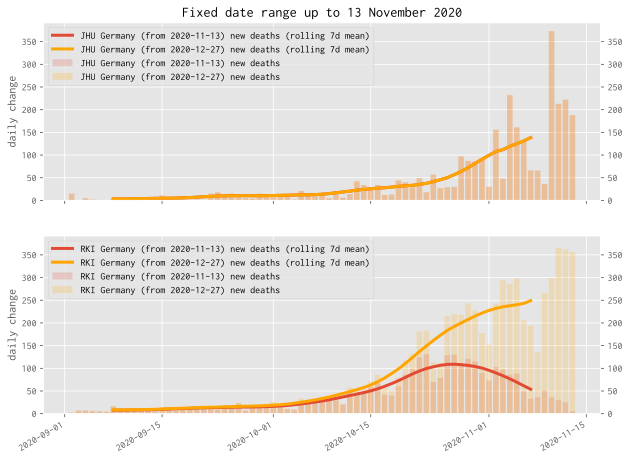

In [26]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
ax = axes[0]
startdate = "2020-09-01"
enddate = "2020-11-13"

ov.plot_daily_change(ax, deaths_jhu_old[startdate:enddate], color="C0", 
                     labels=["JHU Germany (from 2020-11-13)", "deaths"])
ov.plot_daily_change(ax, deaths_jhu[startdate:enddate], color="orange", 
                     labels=[f"JHU Germany (from {todaystring})", "deaths"])


ax = axes[1]
ov.plot_daily_change(ax, deaths_rki_old[startdate:enddate], color="C0", 
                     labels=["RKI Germany (from 2020-11-13)", "deaths"])
fig.autofmt_xdate()
ov.plot_daily_change(ax, deaths_rki[startdate:enddate], color='orange', 
                     labels=[f"RKI Germany (from {todaystring})", "deaths"])
axes[1].set_ylim(axes[0].get_ylim());
axes[0].set_title("Fixed date range up to 13 November 2020");
axes[0].legend()

axes[1].legend()

XXX The deviation in the reported deaths in the last 2 weeks is quite significant.

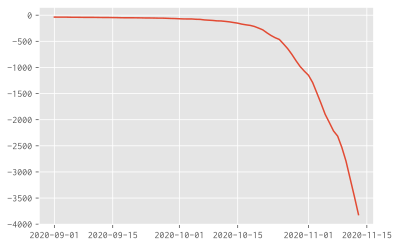

In [28]:
plt.plot(deaths_rki_old[startdate:enddate] - deaths_rki[startdate:enddate])

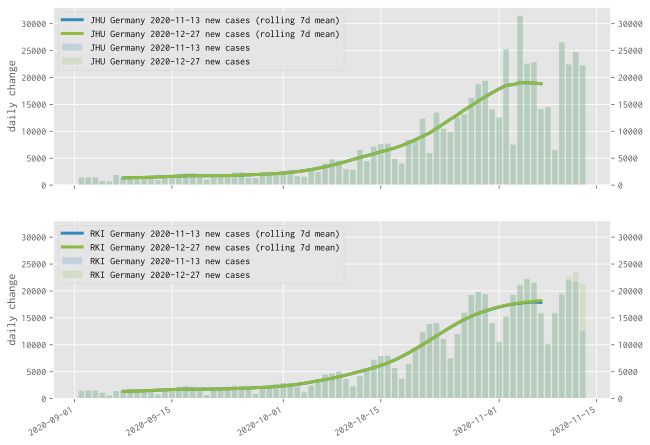

In [30]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
ax = axes[0]
ov.plot_daily_change(ax, cases_jhu_old[startdate:enddate], color="C1", labels=["JHU Germany 2020-11-13", "cases"])
ov.plot_daily_change(ax, cases_jhu[startdate:enddate], color="C5", labels=[f"JHU Germany {todaystring}", "cases"])

ax = axes[1]
ov.plot_daily_change(ax, cases_rki_old[startdate:enddate], color="C1", labels=["RKI Germany 2020-11-13", "cases"])
ov.plot_daily_change(ax, cases_rki[startdate:enddate], color="C5", labels=[f"RKI Germany {todaystring}", "cases"])


fig.autofmt_xdate()
axes[1].set_ylim(axes[0].get_ylim());

The reported cases between JHU and RKI are fairly comparable; although looking at the rolling average the JHU estimates the numbers in the last 2 weeks a bit higher than RKI.

# Comparison cases and deaths for the past few weeks

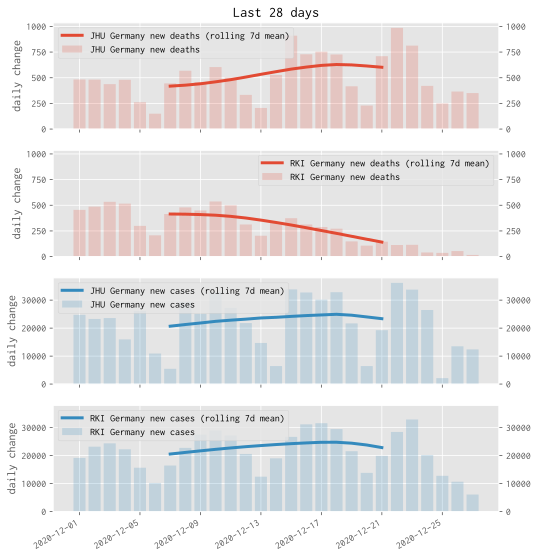

In [26]:
fig, axes = plt.subplots(4, 1, figsize=(8, 10))
ax = axes[0]
last_n_days = 28
ov.plot_daily_change(ax, deaths_jhu[-last_n_days:], color="C0", labels=["JHU Germany", "deaths"])
ax = axes[1]
ov.plot_daily_change(ax, deaths_rki[-last_n_days:], color="C0", labels=["RKI Germany", "deaths"])
fig.autofmt_xdate()
axes[1].set_ylim(axes[0].get_ylim());
axes[0].set_title(f"Last {last_n_days} days");

ax = axes[2]
ov.plot_daily_change(ax, cases_jhu[-last_n_days:], color="C1", labels=["JHU Germany", "cases"])
ax = axes[3]
ov.plot_daily_change(ax, cases_rki[-last_n_days:], color="C1", labels=["RKI Germany", "cases"])
fig.autofmt_xdate()
axes[1].set_ylim(axes[0].get_ylim());
axes[3].set_ylim(axes[2].get_ylim());

In [27]:
delta7 = cases_rki.diff() - cases_rki.diff().shift(7)
delta7 = delta7[-28:]
ratio7 = cases_rki.diff()/cases_rki.diff().shift(7)
ratio7 = ratio7[-28:]

delta7 = cases_rki.diff() - cases_rki.diff().shift(7)
delta7 = delta7[-28:]
ratio7 = cases_rki.diff()/cases_rki.diff().shift(7)
ratio7 = ratio7[-28:]

fig, ax = plt.subplots(2, 1, figsize=(10, 8))
ax[0].bar(delta7.index, delta7.values)
ax[1].plot(ratio7.index, ratio7.values, 'o', label='change from 7 days ago')
ax[1].plot([min(ratio7.index), max(ratio7.index)], [1.0, 1.0], color='grey')
ax[1].legend()
fig.autofmt_xdate()

In [13]:
cases_rki[-10:]

date
2020-11-04    612207
2020-11-05    634381
2020-11-06    655885
2020-11-07    671697
2020-11-08    681861
2020-11-09    697663
2020-11-10    716965
2020-11-11    738917
2020-11-12    760661
2020-11-13    773244
Name: AnzahlFall, dtype: int64